**Assignment 5 Part B - Exploratory Data Analysis**

In [113]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
file1 = "gt_2011.csv"
file2 = "gt_2012.csv"
file3 = "gt_2013.csv"
file4 = "gt_2014.csv"
file5 = "gt_2015.csv"

In [115]:
# Combine the first three years to be used as training data
df = pd.concat(
   map(pd.read_csv, [file1, file2, file3]), ignore_index=True)

In [116]:
# Last two years will be used as our test data
df_test = dataFrame = pd.concat(
   map(pd.read_csv, [file4, file5]), ignore_index=True)

**List of Exploratory Data Analysis for the Dataset**

1. Correlation Plot - Can see which features are related with one another
2. Histogram - see the count distribution of each feature
3. Plot each feature against TEY to see the direct relationship
4. Pairplot to see relationship between all features
5. Time Series to compare changes/differences between years for TEY and CO (Worse for Global warming) to see significance differences

**From the dataset webpage - Meaning of each acronym**

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C 6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

The dataset contains instances of 11 sensor measures aggregated over one hour (by means of average or sum) throughout 5 years

In [117]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
22186  4.8631  1027.0  81.084  4.2825  34.045  1100.0  529.98  168.38  14.290   
22187  4.5173  1027.4  80.813  4.2481  33.904  1100.1  530.47  168.07  14.344   
22188  4.2717  1027.9  80.380  4.2817  34.165  1099.9  529.56  168.55  14.395   
22189  4.0853  1028.6  78.907  4.2313  33.802  1100.1  530.61  167.98  14.343   
22190  4.2148  1029.4  70.679  4.2049  33.768  1100.0  530.97  167.30  14.291   

            CO     NOX  
0      0.32663  81.952  
1      0.44784  82.377  
2      0.45144  83.776  
3      0.23107  82.505  
4      0.26747  82.028  
...        ...     ...  
22186  1.25380  78.397  
22187  1.08080  78.251  
22188  1.04720  77.269  
22189  1.08750  77.985  
22190  1.13370  78.950  

[22191 rows x 11 columns]

In [118]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22191 entries, 0 to 22190
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      22191 non-null  float64
 1   AP      22191 non-null  float64
 2   AH      22191 non-null  float64
 3   AFDP    22191 non-null  float64
 4   GTEP    22191 non-null  float64
 5   TIT     22191 non-null  float64
 6   TAT     22191 non-null  float64
 7   TEY     22191 non-null  float64
 8   CDP     22191 non-null  float64
 9   CO      22191 non-null  float64
 10  NOX     22191 non-null  float64
dtypes: float64(11)
memory usage: 1.9 MB


In [119]:
# Describe the data
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  22191.000000  22191.000000  22191.000000  22191.000000  22191.000000   
mean      17.712247   1012.812607     79.555224      4.037750     25.317873   
std        7.352789      6.396588     13.915018      0.810223      4.234147   
min        0.289850    985.850000     27.504000      2.087400     17.878000   
25%       11.664500   1008.800000     70.294500      3.449850     22.736000   
50%       17.739000   1012.400000     82.781000      4.068800     24.989000   
75%       23.657000   1016.700000     90.532000      4.451400     26.839000   
max       34.929000   1034.200000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  22191.000000  22191.000000  22191.000000  22191.000000  22191.000000   
mean    1083.080280    545.520170    133.537393     12.060208      2.214390   
std       16.840765      7.708708     16.026107      1.114265      2.295746   
min     1000.800000    512.450000    100.170000      9.875400      0.000388   
25%     1074.600000    542.600000    124.260000     11.395000      0.995375   
50%     1088.100000    549.900000    133.770000     12.001000      1.524200   
75%     1095.300000    550.050000    138.645000     12.443500      2.542400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  22191.000000  
mean      68.776529  
std       11.036231  
min       27.765000  
25%       61.548000  
50%       67.096000  
75%       74.572000  
max      119.910000

In [120]:
df.shape

(22191, 11)

In [121]:
#Find the duplicates

df.duplicated().sum()

0

In [122]:
# Find null values

df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [123]:
# Datatypes, all integers

df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

**Part B - Question 3 (Data Preprocessing/Cleaning)**

No null/missing values, no need for data cleaning / preprocessing

**Correlation Plot**

In [124]:
# Find the correlation between the features

df.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.354392 -0.563459  0.112448 -0.046755  0.099422  0.336315   
AP   -0.354392  1.000000  0.018595  0.058140  0.123358  0.078647 -0.228463   
AH   -0.563459  0.018595  1.000000 -0.243702 -0.199351 -0.251107  0.010075   
AFDP  0.112448  0.058140 -0.243702  1.000000  0.682370  0.622600 -0.477653   
GTEP -0.046755  0.123358 -0.199351  0.682370  1.000000  0.881875 -0.760267   
TIT   0.099422  0.078647 -0.251107  0.622600  0.881875  1.000000 -0.375879   
TAT   0.336315 -0.228463  0.010075 -0.477653 -0.760267 -0.375879  1.000000   
TEY  -0.193230  0.177044 -0.114338  0.644780  0.978357  0.900624 -0.720048   
CDP  -0.090231  0.166870 -0.183888  0.673072  0.994361  0.896039 -0.745111   
CO   -0.110304 -0.021856  0.197972 -0.408425 -0.552922 -0.728982  0.095317   
NOX  -0.589204  0.192186  0.159822 -0.180187 -0.143650 -0.195596 -0.051954   

           TEY       CDP        CO       NOX  
AT   -0.193230 -0.090231 -0.110304 -0.589204  
AP    0.177044  0.166870 -0.021856  0.192186  
AH   -0.114338 -0.183888  0.197972  0.159822  
AFDP  0.644780  0.673072 -0.408425 -0.180187  
GTEP  0.978357  0.994361 -0.552922 -0.143650  
TIT   0.900624  0.896039 -0.728982 -0.195596  
TAT  -0.720048 -0.745111  0.095317 -0.051954  
TEY   1.000000  0.989150 -0.586477 -0.055082  
CDP   0.989150  1.000000 -0.567705 -0.113780  
CO   -0.586477 -0.567705  1.000000  0.341552  
NOX  -0.055082 -0.113780  0.341552  1.000000

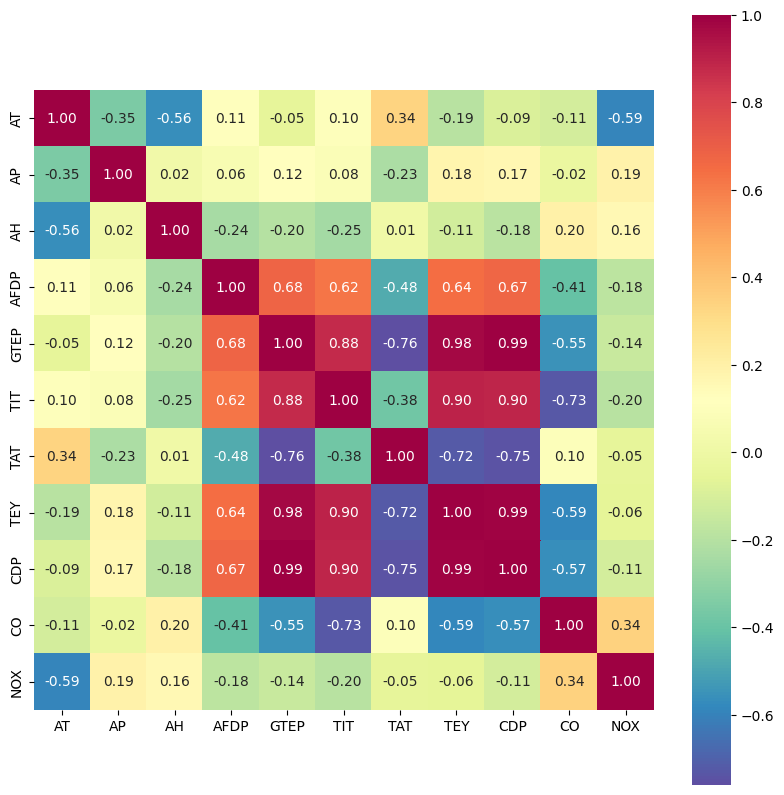

In [125]:
#Correlation plot to easily visualize it

corrmat = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

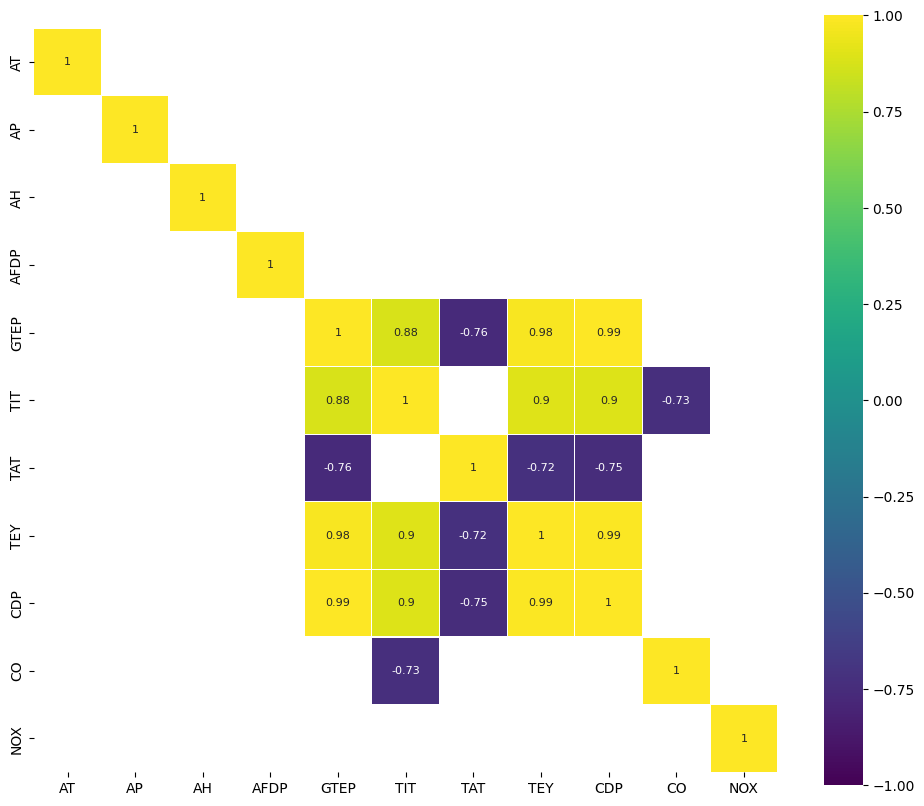

In [126]:
plt.figure(figsize=(12, 10))

sns.heatmap(corrmat[(corrmat >= 0.7) | (corrmat <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

We can observe that multiple features are correlated with one another, mostly the compressor features and not regarding the environment conditions. 

Features such as the air filter difference pressure, gas turbine exhaust pressure, turbine inlet temperature, turbine energy yield, and compressor discharge pressure are highly correlated with one another. 

For the Turbine energy yield, we can observe that the values are highly correlated with the gas turbine exhaust pressure, turbine inlet temperature, and compressor discharge pressure

**Histogram**

Text(0, 0.5, 'Count')

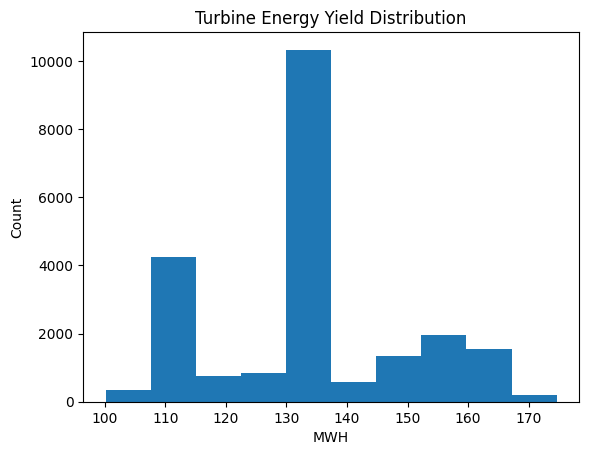

In [127]:
plt.hist(df['TEY'])
plt.title("Turbine Energy Yield Distribution")
plt.xlabel("MWH")
plt.ylabel("Count")

We see that the turbine energy yield is most likely between 130 and 140 MWH. 

There is also a large number of occurances at around 110 MWH, this may be an issue if there is a minimum amount of energy required to be met

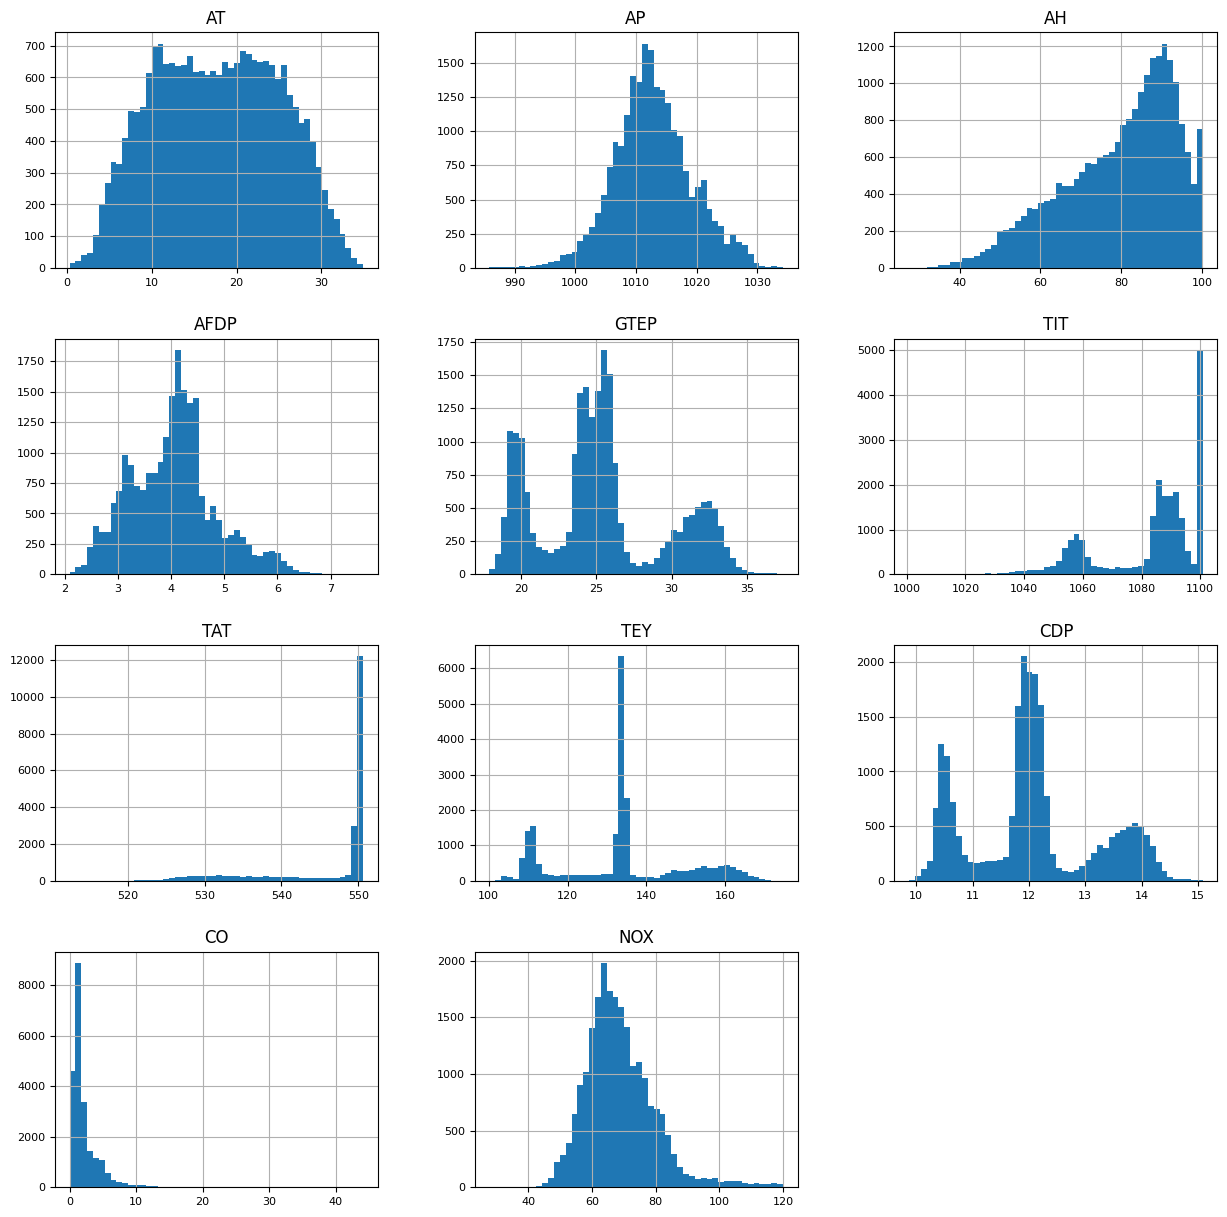

In [167]:
df.hist(figsize=(15, 15), bins=50, xlabelsize=8, ylabelsize=8);

# Want to find features that have a similar distribution to the Turbine Energy Yield

We can observe that there are some features that have a similar distribution to TEY such as the CDP and a bit of GTEP, we can also observe that AP and NOx follow similar to a normal distribution based on the bell shaped curve

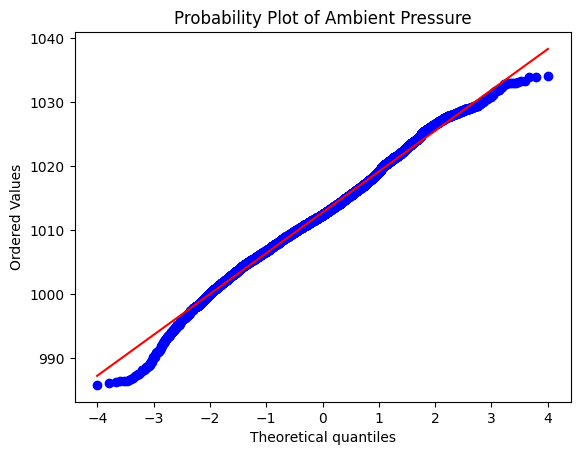

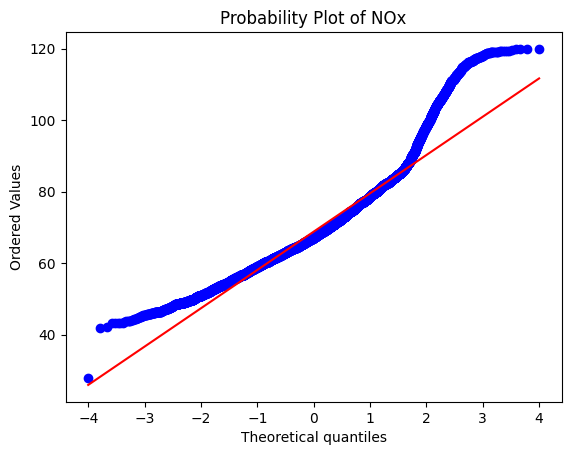

In [159]:
import pylab 
import scipy.stats as stats
stats.probplot(df['AP'], dist="norm", plot=pylab)
plt.title('Probability Plot of Ambient Pressure')
pylab.show()
stats.probplot(df['NOX'], dist="norm", plot=pylab)
plt.title('Probability Plot of NOx')
pylab.show()

We can observe that the ambient pressure there follows a normal distribution, the amount of NOx emissions has a normal distribution around the average values and skews around the ends.

**Find the relationship between features and Turbine Energy Yield using Scatter Plots**

In [129]:
features_to_analyse = df.columns

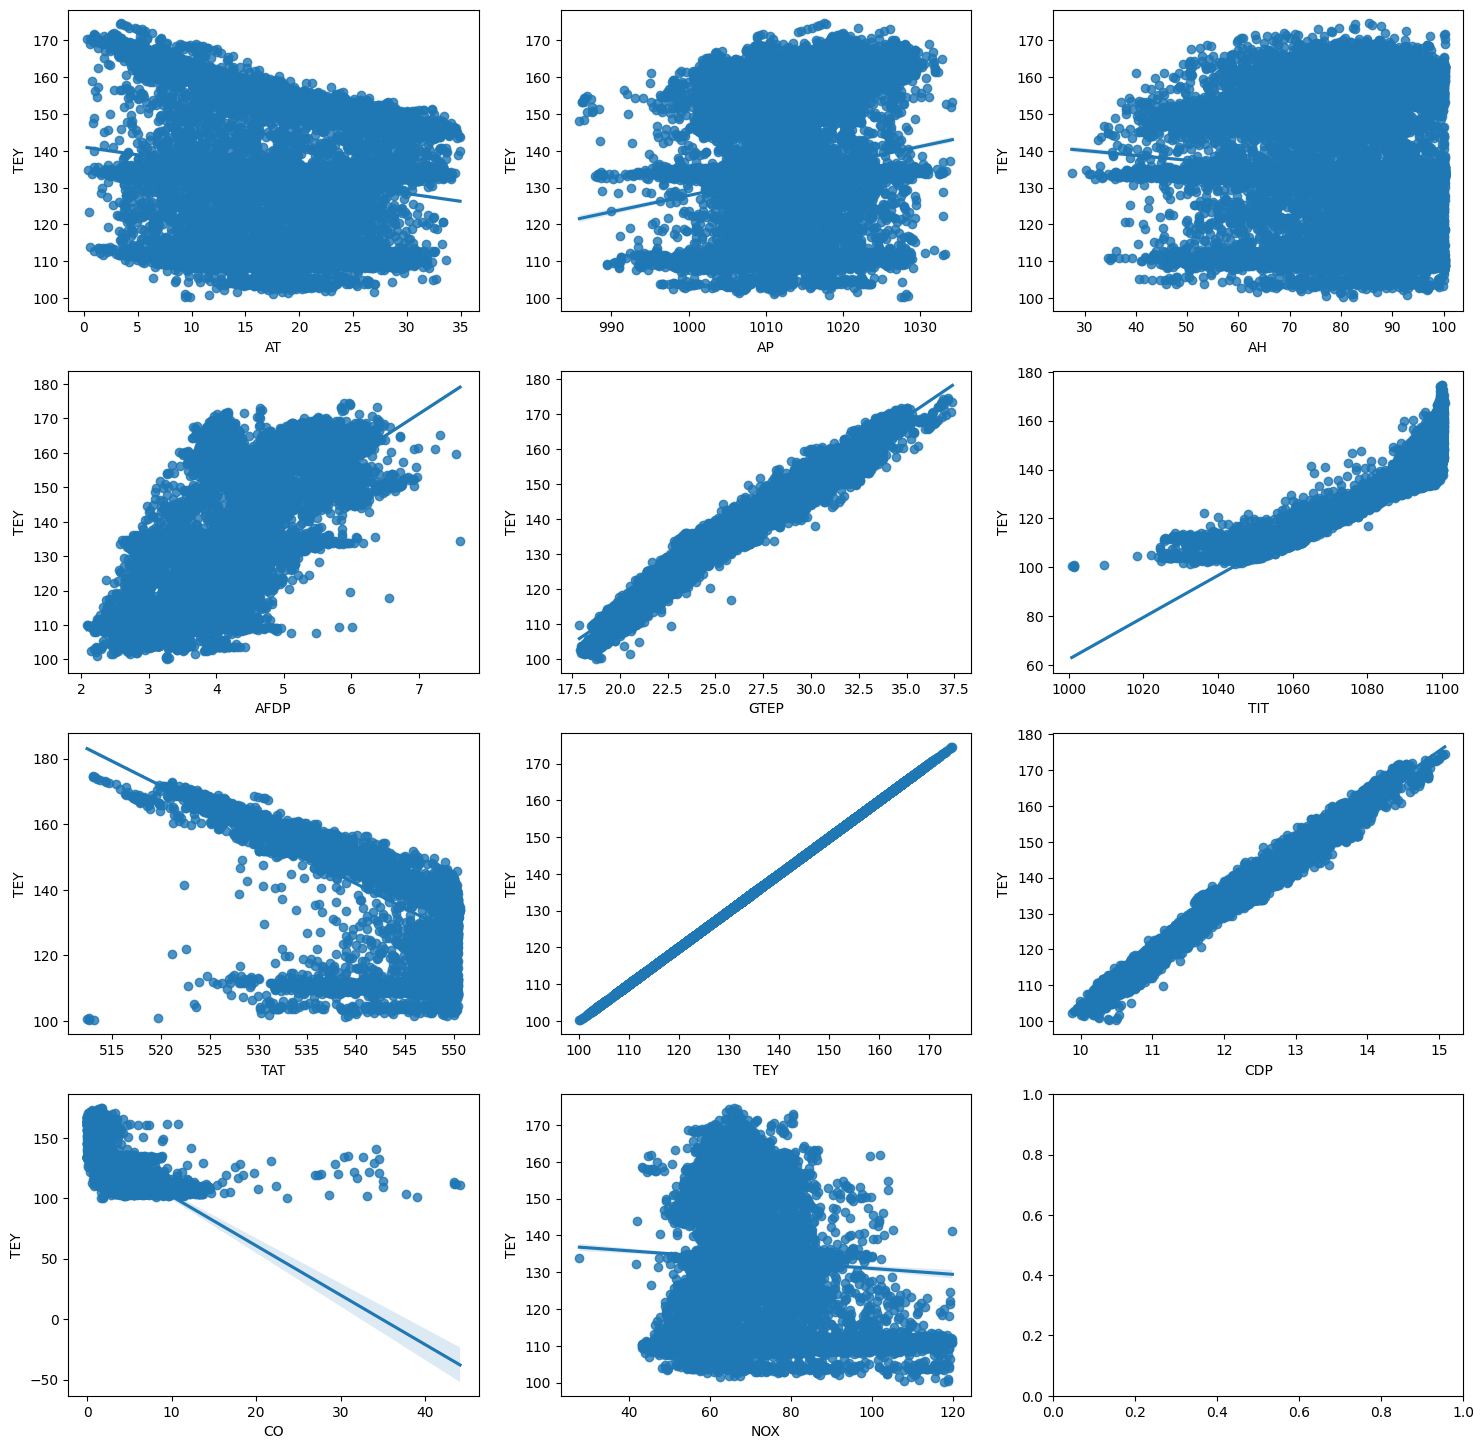

In [130]:
fig, ax = plt.subplots(4, 3, figsize = (18, 18))

for i, ax in enumerate(fig.axes):
    if i < 11:
        sns.regplot(x=features_to_analyse[i],y='TEY', data=df[features_to_analyse], ax=ax)

We can double check the relationship by plotting it against TEY, it is observed that GTEP and CDP fall in a straight line, thus follow a similar distribution as the TEY.  

**Gas Emissions and Global Warming Concerns**

Observe the relationship between TYE and the CO and NOx emissions

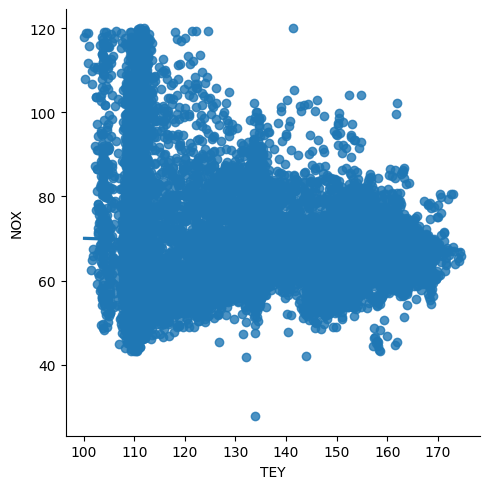

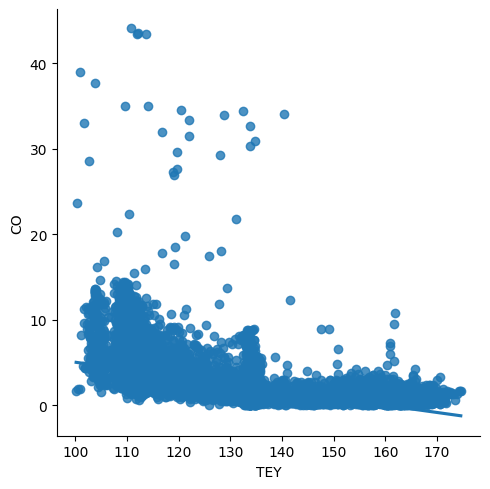

In [131]:
sns.lmplot(x ='TEY', y ='NOX', data=df)
sns.lmplot(x = 'TEY', y ='CO', data=df)
  
# Show the plot 
plt.show() 

There's also an objective to minimize the emissions of gas turbines while maintaining the purpose of the gas turbine, high yield energy. It seems that a high energy yield does not mean higher CO or NOx emissions

**Pairplot to see related features**

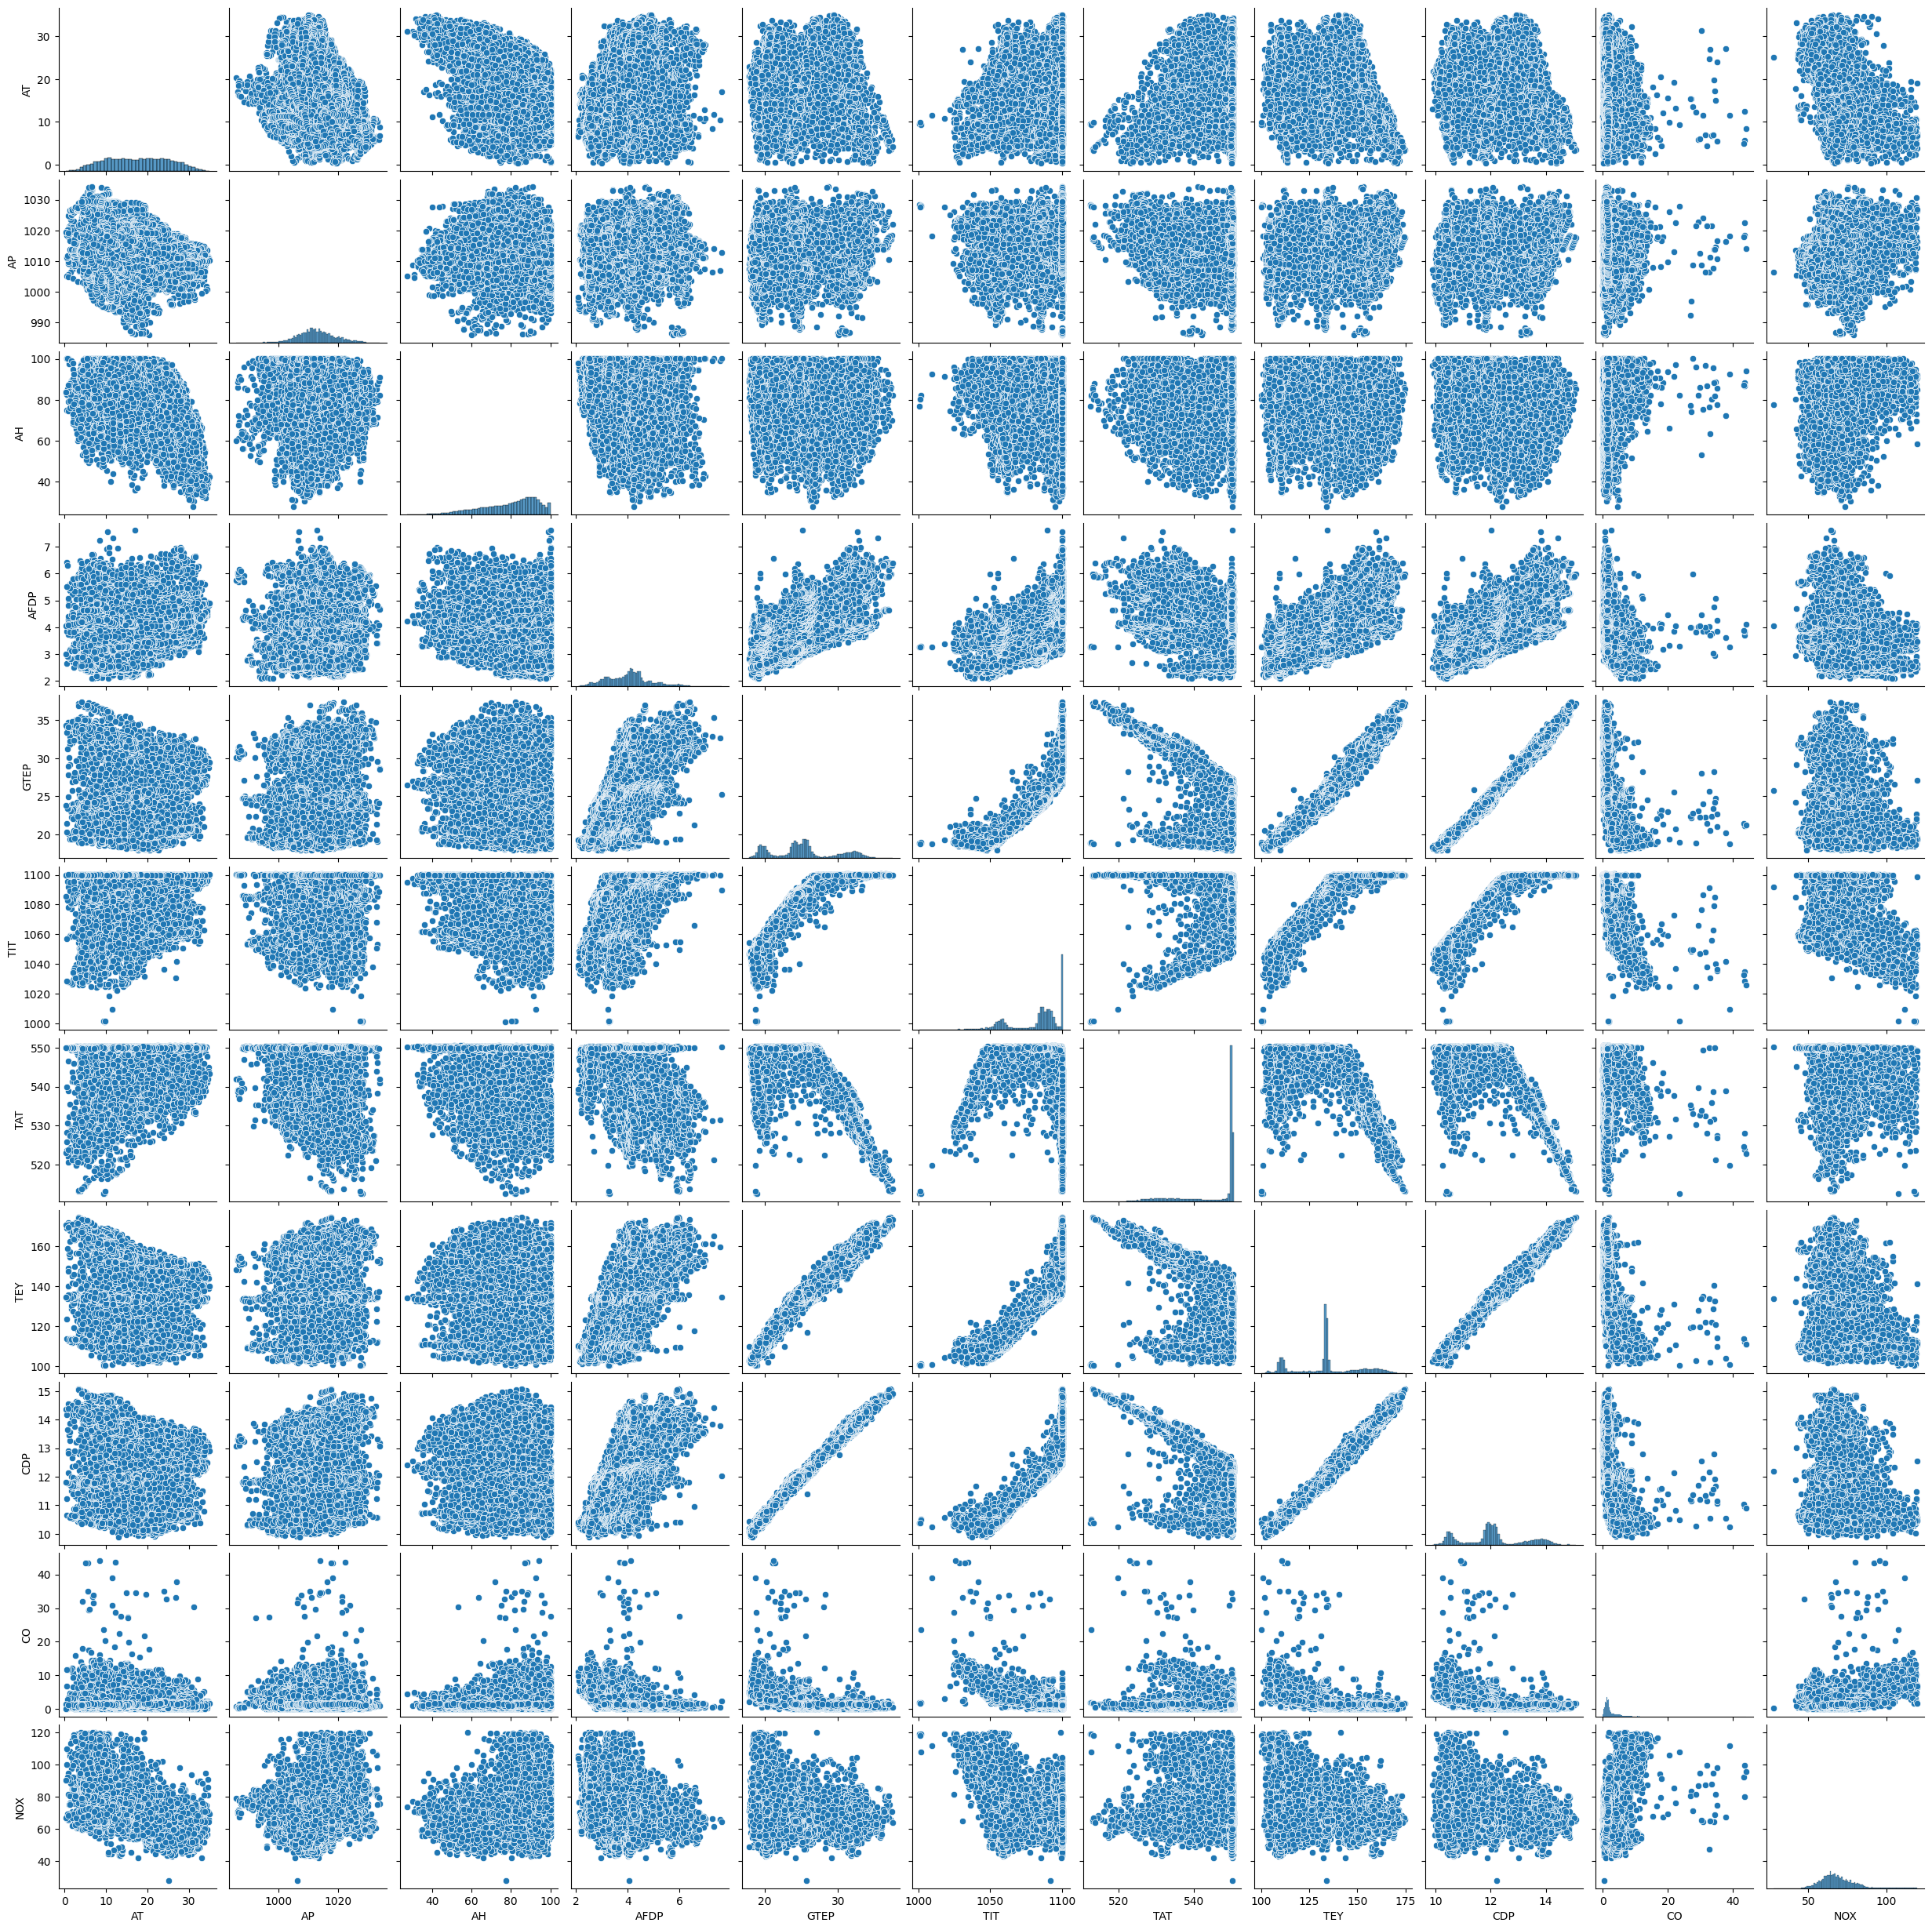

In [132]:
g = sns.pairplot(df);
g.fig.set_size_inches(25,25)
# We're looking for graphs that fit a linear relationship with one another

We can see a linear relationship between GTEP and TEY and CDP

**Time Series**

See if there's any difference between years, 2011, 2012, and 2013

In [133]:
df_2011= pd.concat(
   map(pd.read_csv, [file1]), ignore_index=True)
df_2012= pd.concat(
   map(pd.read_csv, [file2]), ignore_index=True)
df_2013= pd.concat(
   map(pd.read_csv, [file3]), ignore_index=True)

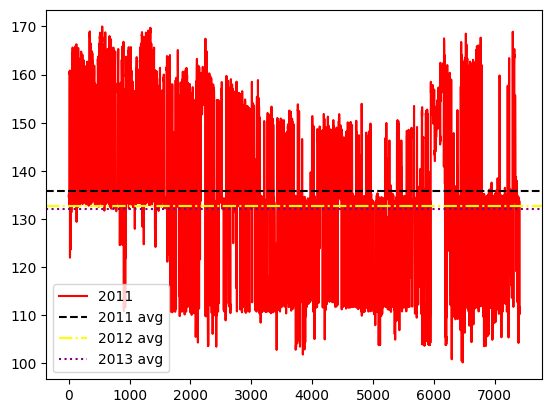

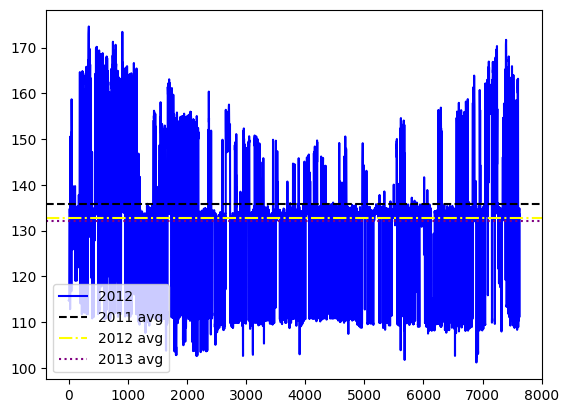

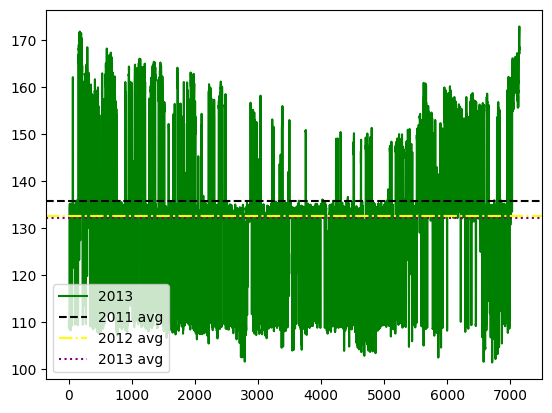

In [134]:
df_2011.plot(y='TEY', color='r', use_index=True, label = '2011')
plt.axhline(y=np.nanmean(df_2011['TEY']), color='black', linestyle='--',label = '2011 avg')
plt.axhline(y=np.nanmean(df_2012['TEY']), color='yellow', linestyle='-.', label = '2012 avg')
plt.axhline(y=np.nanmean(df_2013['TEY']), color='purple', linestyle=':', label = '2013 avg')
plt.legend(loc="lower left")
df_2012.plot(y='TEY', color='b', use_index=True, label = '2012')
plt.axhline(y=np.nanmean(df_2011['TEY']), color='black', linestyle='--',label = '2011 avg')
plt.axhline(y=np.nanmean(df_2012['TEY']), color='yellow', linestyle='-.', label = '2012 avg')
plt.axhline(y=np.nanmean(df_2013['TEY']), color='purple', linestyle=':', label = '2013 avg')
plt.legend(loc="lower left")
df_2013.plot(y='TEY', color='g', use_index=True, label = '2013')
plt.axhline(y=np.nanmean(df_2011['TEY']), color='black', linestyle='--',label = '2011 avg')
plt.axhline(y=np.nanmean(df_2012['TEY']), color='yellow', linestyle='-.', label = '2012 avg')
plt.axhline(y=np.nanmean(df_2013['TEY']), color='purple', linestyle=':', label = '2013 avg')
plt.legend(loc="lower left");

We can see that the minimum and maximum range for the Turbine Energy Yield stays the same throughout the years, we see that the average energy output is slightly decreasing. In 2011, we can observe that the energy yield was higher for the first quarter, and for the middle of the graphs, there are many more low points, this may be due to the fact that we require more energy/electricty in the winter comapred to the summer.

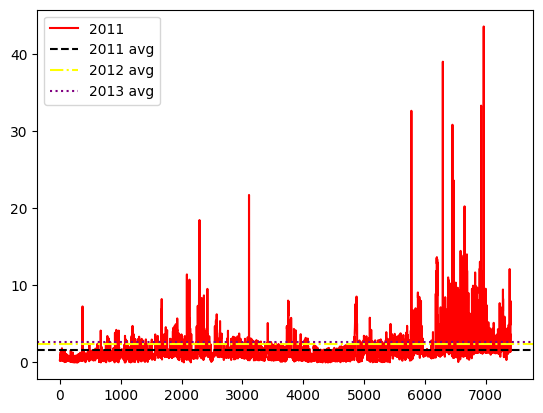

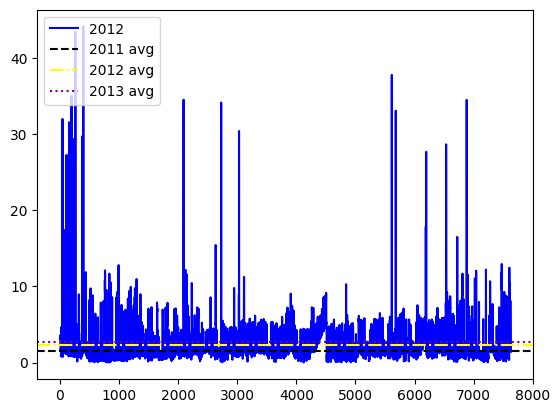

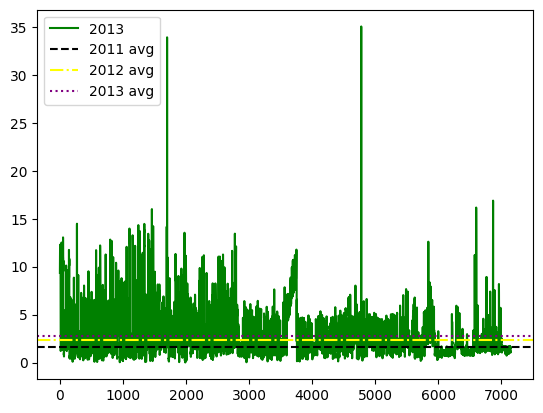

In [135]:
df_2011.plot(y='CO', color='r', use_index=True, label = '2011')
plt.axhline(y=np.nanmean(df_2011['CO']), color='black', linestyle='--',label = '2011 avg')
plt.axhline(y=np.nanmean(df_2012['CO']), color='yellow', linestyle='-.', label = '2012 avg')
plt.axhline(y=np.nanmean(df_2013['CO']), color='purple', linestyle=':', label = '2013 avg')
plt.legend(loc="upper left")
df_2012.plot(y='CO', color='b', use_index=True, label = '2012')
plt.axhline(y=np.nanmean(df_2011['CO']), color='black', linestyle='--',label = '2011 avg')
plt.axhline(y=np.nanmean(df_2012['CO']), color='yellow', linestyle='-.', label = '2012 avg')
plt.axhline(y=np.nanmean(df_2013['CO']), color='purple', linestyle=':', label = '2013 avg')
plt.legend(loc="upper left")
df_2013.plot(y='CO', color='g', use_index=True, label = '2013')
plt.axhline(y=np.nanmean(df_2011['CO']), color='black', linestyle='--',label = '2011 avg')
plt.axhline(y=np.nanmean(df_2012['CO']), color='yellow', linestyle='-.', label = '2012 avg')
plt.axhline(y=np.nanmean(df_2013['CO']), color='purple', linestyle=':', label = '2013 avg')
plt.legend(loc="upper left");

We can see that the minimum and maximum range for the CO emissions are roughly the same throughout the years, we see that the average CO emissions is increasing over the years. There are a few outliers with high spikes in NOx emissions.

**Part 4 - Machine Learning Models**

In [137]:
#Standardize Data
mu,si = df.mean(), df.std() #Calculate the overall mean and standard deviation of the quality scores
df_standard = df - mu #Subtract the mean from every entry
df_standard = df_standard / si #Divide every entry by the standard deviation
#Confirm if the data has been normalized
df_standard

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0     -1.784962  0.920396  0.296067 -0.570152 -0.316208  0.185248  0.559086   
1     -1.825028  0.857863  0.336311 -0.576199 -0.322821  0.179310  0.587625   
2     -1.877892  0.873496  0.381083 -0.561512 -0.313610  0.203062  0.605786   
3     -1.899775  0.857863  0.422477 -0.563981 -0.332268  0.203062  0.603192   
4     -1.898687  0.779696  0.404367 -0.567313 -0.330851  0.167434  0.581139   
...         ...       ...       ...       ...       ...       ...       ...   
22186 -1.747520  2.217963  0.109865  0.302077  2.061130  1.004688 -2.015924   
22187 -1.794550  2.280496  0.090390  0.259620  2.027829  1.010626 -1.952360   
22188 -1.827952  2.358663  0.059272  0.301090  2.089471  0.998750 -2.070408   
22189 -1.853303  2.468096 -0.046585  0.238885  2.003739  1.010626 -1.934198   
22190 -1.835691  2.593163 -0.637888  0.206301  1.995709  1.004688 -1.887498   

            TEY       CDP        CO       NOX  
0      0.070673 -0.145574 -0.822286  1.193838  
1      0.070673 -0.150958 -0.769488  1.232347  
2      0.097504 -0.016341 -0.767920  1.359112  
3      0.093136 -0.063008 -0.863911  1.243946  
4      0.070673 -0.134804 -0.848055  1.200724  
...         ...       ...       ...       ...  
22186  2.174115  2.001133 -0.418422  0.871717  
22187  2.154772  2.049596 -0.493778  0.858488  
22188  2.184723  2.095366 -0.508414  0.769508  
22189  2.149156  2.048698 -0.490860  0.834385  
22190  2.106725  2.002031 -0.470736  0.921825  

[22191 rows x 11 columns]

In [138]:
y_train = df['TEY']
df_standard.drop('TEY', inplace = True, axis = 1)

In [139]:
#Standardize Data
mu,si = df_test.mean(), df_test.std() #Calculate the overall mean and standard deviation of the quality scores
df_test_standard = df_test - mu #Subtract the mean from every entry
df_test_standard = df_test_standard / si #Divide every entry by the standard deviation
y_test = df_test['TEY']
df_test_standard.drop('TEY', inplace = True, axis = 1)
#Confirm if the data has been normalized
df_test_standard

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0     -1.169670  1.334959  1.575934 -0.752743 -0.678310 -0.624609  0.550436   
1     -1.141066  1.273840  1.488782 -0.803901 -0.664924 -0.602706  0.522986   
2     -1.115571  1.197441  1.423653 -0.807282 -0.643264 -0.569851  0.540632   
3     -1.098074  1.136323  1.384575 -0.791406 -0.602133 -0.509618  0.550436   
4     -1.072185  1.121043  1.351003 -0.829774 -0.665411 -0.591754  0.528868   
...         ...       ...       ...       ...       ...       ...       ...   
14537 -1.855978  2.297581  1.202482 -0.864614 -1.667633 -2.294709 -1.086733   
14538 -1.784751  2.312861  1.258614 -0.826099 -1.684912 -2.261854 -0.951446   
14539 -1.611547  2.297581  1.338045 -0.648958 -1.723609 -2.239951 -0.716165   
14540 -1.558622  2.328140  1.269626  0.336419 -0.578282 -0.109889  0.583767   
14541 -1.538134  2.343420  1.292924  0.177800 -0.831150 -0.602706  0.215159   

            CDP        CO       NOX  
0     -0.648385 -0.318801  0.786105  
1     -0.557803 -0.253076  0.816170  
2     -0.482477 -0.206261  0.789130  
3     -0.497733 -0.224850  0.722477  
4     -0.550175 -0.209549  0.616587  
...         ...       ...       ...  
14537 -1.573273  3.827153  2.760190  
14538 -1.637157  3.896121  2.729652  
14539 -1.524645  4.019440  3.419637  
14540 -0.276522  0.319583  0.450094  
14541 -0.571152  4.278411  4.657505  

[14542 rows x 10 columns]

**Multiple Linear Regression Model**

Multiple Linear Regression model was chosen to predict the Turbine energy yield, this is one of the most simpliest predictive regression models. We can see if a linear scaling of the features can be summed up to determine the turbine yield energy. Linear regression predicts the weights of each feature. It used the method of ordinary least squares, minimize the sum of squared residuals (SSR) to determine the best weights.

In [140]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(df_standard, y_train)

In [141]:
y_prediction =  model.predict(df_test_standard)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.9831772531448139
mean_sqrd_error is== 3.7727061796151267
root_mean_squared error of is== 1.9423455355870969


The accuracy score is pretty high at about 98%, the RMSE is also pretty low at about 2 MWH considering its goes on average to 130 MWH

R2 score is the coefficient of determination, the amount of variation in the target (Turbine energy yield) that can be explained by the dependence of the input features.

We can improve the accuracy by hypertuning the model

In [165]:
y_check = model.predict(df_standard)
score=r2_score(y_check,y_train)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_check,y_train))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_check,y_train)))

r2 score is  0.9978385437961127
mean_sqrd_error is== 0.5539177168382373
root_mean_squared error of is== 0.7442564859228553


We ran the model against the training data again to see whether it was overfitting or underfitting, the model did slightly better on the training data compared to the test data so the model but still has relatively high R2 scores. The simple multi linear regression model is slightly overfitting the training data. 

In [163]:
print(model.coef_)
print(df_standard.columns)
print(model.intercept_)

[-2.60817789 -0.3806715  -0.0876376  -0.06562801  0.93759214  9.64556195
 -4.29575866  2.88959302 -0.03448007 -0.20546109]
Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'], dtype='object')
133.5373930872805


Since the data is normalized, the bias is set at around the average value and we can examine the weight of each feature. Can observe that a higher Turbine inlet temperature and Compressor Discharge pressure is correlated for a higher turbine energy yield. 

**XGBoost **

XGBoost is Extreme Gradient Boost, Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models. XGBoost is a library for developing fast and high performance gradient boosting tree models which can be used for solving regression type problems.

In [142]:
import xgboost as xgb

In [171]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [172]:
xg_reg.fit(df_standard,y_train)

preds = xg_reg.predict(df_test_standard)

In [173]:
score=r2_score(y_test,preds)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,preds))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,preds)))

r2 score is  0.9138600189298023
mean_sqrd_error is== 19.31794145706231
root_mean_squared error of is== 4.395218021561878


First tried this model with the learning rate as 0.1, the RMSE was about 46, this meant that the model was overfitting. Now the RMSE is around 4.4 MWH which is relatively low without too many hyperparameter tuning

In [174]:
y_checkXG = xg_reg.predict(df_standard)
score=r2_score(y_checkXG,y_train)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_checkXG,y_train))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_checkXG,y_train)))

r2 score is  0.9939731041110403
mean_sqrd_error is== 1.5545162976502156
root_mean_squared error of is== 1.246802429276674


We ran the model against the training data again to see whether it was overfitting or underfitting, the model did slightly better on the training data compared to the test data so the model but still has high R2 scores. The more complex XGBoost model is slightly overfitting the training data. 

**Comparing the two machine learning**

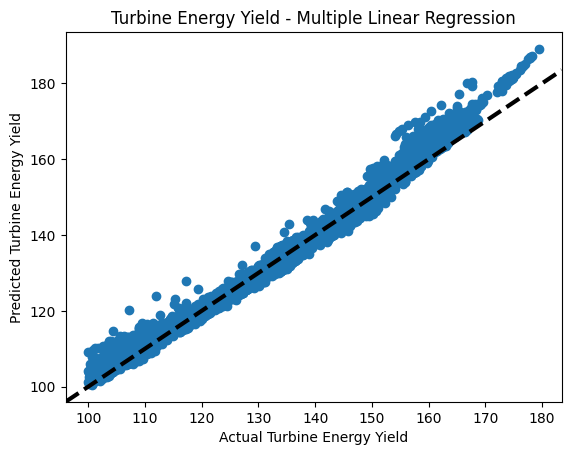

In [175]:
plt.scatter(x = y_test, y = y_prediction)
plt.title("Turbine Energy Yield - Multiple Linear Regression")
plt.xlabel("Actual Turbine Energy Yield")
plt.ylabel("Predicted Turbine Energy Yield")
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False);

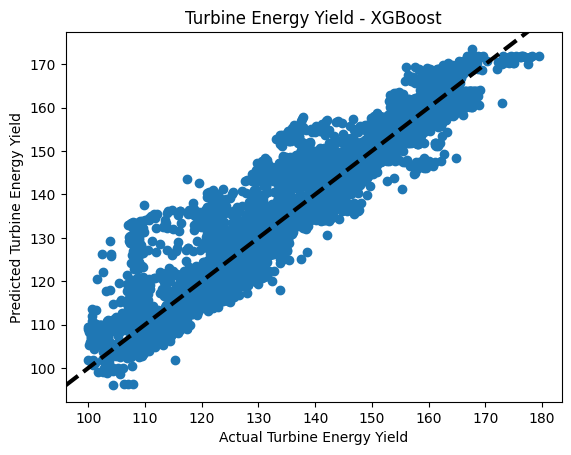

In [170]:
plt.scatter(x = y_test, y = preds)
plt.title("Turbine Energy Yield - XGBoost")
plt.xlabel("Actual Turbine Energy Yield")
plt.ylabel("Predicted Turbine Energy Yield")
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False);

Our simple multiple linear regression model performed better than the complex XGBoost model in terms of having a higher accuracy (R2 score) and a lower RMSE value